Text(0.5, 1.0, "Genders' frequency in each charge")

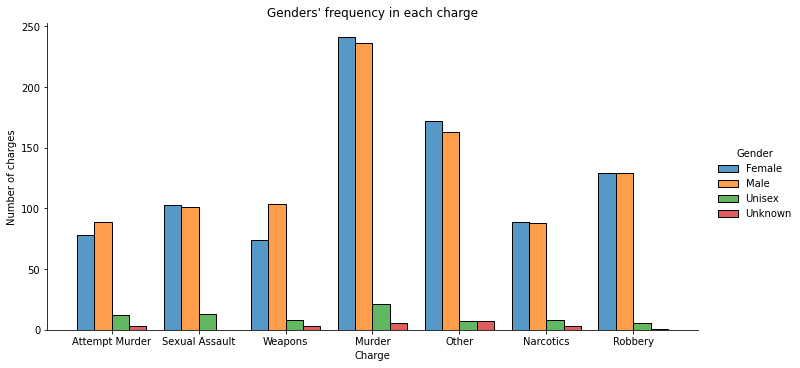

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

court_data = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/court_prep_2.csv')

court_df = pd.DataFrame(court_data)

#Court Days
gender_courtdays = court_df.pivot_table(index=["Gender"], 
               columns=["charge"], 
               values=["court_d"], 
               aggfunc=[np.mean])

gender_courtdays['Average']= gender_courtdays.mean(axis=1)
gender_courtdays

gender_bar_graph = sns.displot(data=court_df, x='charge', hue='Gender', multiple='dodge', shrink=.8, height=5, aspect=2)
gender_bar_graph.set(xlabel='Charge', ylabel='Number of charges')
plt.title('Genders\' frequency in each charge')

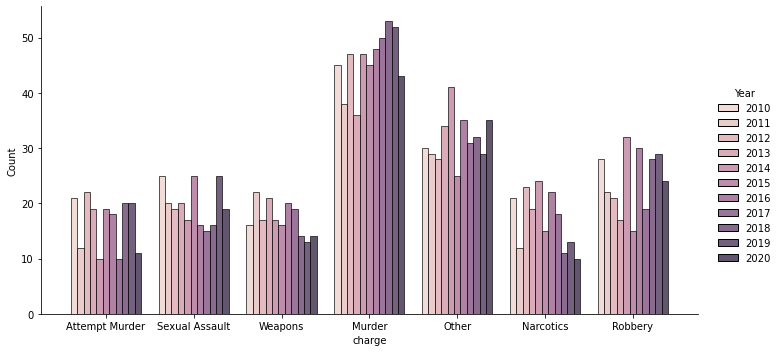

In [2]:
# year treads for number of occurrences on different charges
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/court_prep_2.csv')

sns.displot(data=df, x='charge', hue='Year', multiple='dodge', shrink=.8, height=5, aspect=2)

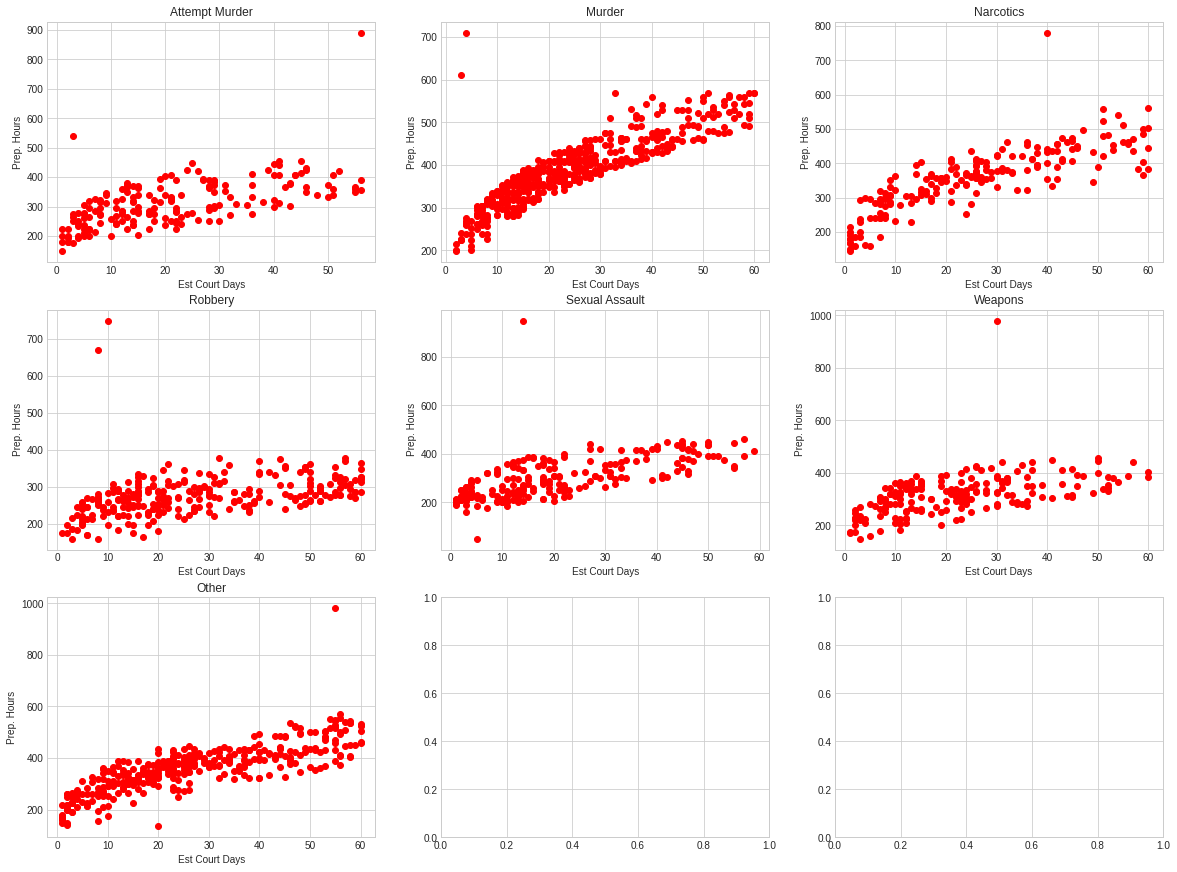

Observation:
 1 - I see a cruve pattern in almost all of the charges 
 2 - there are some outliers


In [1]:
# to graph all the charges next to gether (matrix fromat)


import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

court_prep = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/court_prep_2.csv')
court_prep.head()

df = pd.DataFrame(dict(x = court_prep['court_d'],
               y = court_prep['prep_h'],
               label = court_prep['charge']))



df1 = df[['x','y','label']].loc[df.label == 'Attempt Murder']
df2 = df[['x','y','label']].loc[df.label == 'Murder']
df3 = df[['x','y','label']].loc[df.label == 'Narcotics']
df4 = df[['x','y','label']].loc[df.label == 'Robbery']
df5 = df[['x','y','label']].loc[df.label == 'Sexual Assault']
df6 = df[['x','y','label']].loc[df.label == 'Weapons']
df7 = df[['x','y','label']].loc[df.label == 'Other']


#fig.tight_layout(pad=9)


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows = 3, ncols = 3, figsize=(20, 15))

ax1.scatter(df1['x'],df1['y'], c = 'red')
ax2.scatter(df2['x'],df2['y'], c = 'red')
ax3.scatter(df3['x'],df3['y'], c = 'red')
ax4.scatter(df4['x'],df4['y'], c = 'red')
ax5.scatter(df5['x'],df5['y'], c = 'red')
ax6.scatter(df6['x'],df6['y'], c = 'red')
ax7.scatter(df7['x'],df7['y'], c = 'red')

ax1.set(title='Attempt Murder', xlabel='Est Court Days', ylabel='Prep. Hours')
ax2.set(title='Murder', xlabel='Est Court Days', ylabel='Prep. Hours')
ax3.set(title='Narcotics', xlabel='Est Court Days', ylabel='Prep. Hours')
ax4.set(title='Robbery', xlabel='Est Court Days', ylabel='Prep. Hours')
ax5.set(title='Sexual Assault', xlabel='Est Court Days', ylabel='Prep. Hours')
ax6.set(title='Weapons', xlabel='Est Court Days', ylabel='Prep. Hours')
ax7.set(title='Other', xlabel='Est Court Days', ylabel='Prep. Hours')

plt.show()

fig.savefig('Matrix Scatter.jpg')

print("Observation:\n 1 - I see a cruve pattern in almost all of the charges \n 2 - there are some outliers")
    


In [2]:
import pandas as pd
import numpy as np
from scipy import stats


df = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/prep_court_no_outlier.csv')

#df = pd.read_csv('./court_prep_2.csv')
#df = pd.read_csv('./prep_court_no_outlier.csv')

df = pd.DataFrame(dict(x = df['court_d'],
                       y = df['prep_h'],
                       label = df['charge']))

df.loc[ df.label == 'Murder','label2'] = 'Murder'
df.loc[ df.label == 'Robbery','label2'] = 'Robbery'
df.loc[(df.label == 'Attempt Murder') | 
       (df.label == 'Sexual Assault') | 
       (df.label == 'Weapons'),'label2'] = 'Attempt Murder & Sexual Assault & Weapons'
df.loc[(df.label == 'Narcotics') | 
       (df.label == 'Other'),'label2'] = 'Narcotics & Other'




# remove duplicates
chargelist = df['label2']
chargelist = list(dict.fromkeys(chargelist))
chargelist.sort()






# individual Pearson Corr for each charge

print("\n\n\n")
print("Pearson Correlation Test for each charge: \n H_0:There is no correlation between Est. Court Days and Prep. Hours\n H_1: reject H_0 \n Alpha = 0.01")
print("\n")

for i in chargelist:
    a = df['x'].loc[df.label2 == i]
    b = df['y'].loc[df.label2 == i]
    pearson,p_value = stats.pearsonr(a,b)
    print("Charge: ",i)
    print("The Test result:\n Pearson Correlation is:",round(pearson,2),"\n P_Value is: ", round(p_value,4))
    if p_value <= 0.01:
        print("Observation:\n with alpha = 0.01, H_0 is rejected\n")
    else:
        print("Observation: /n There is not enough evidence to reject H_0\n")

        
print("Observation:\n it seems that we have statistical support to use Est. Court Days to predict the number of preparation hours")





Pearson Correlation Test for each charge: 
 H_0:There is no correlation between Est. Court Days and Prep. Hours
 H_1: reject H_0 
 Alpha = 0.01


Charge:  Attempt Murder & Sexual Assault & Weapons
The Test result:
 Pearson Correlation is: 0.69 
 P_Value is:  0.0
Observation:
 with alpha = 0.01, H_0 is rejected

Charge:  Murder
The Test result:
 Pearson Correlation is: 0.91 
 P_Value is:  0.0
Observation:
 with alpha = 0.01, H_0 is rejected

Charge:  Narcotics & Other
The Test result:
 Pearson Correlation is: 0.84 
 P_Value is:  0.0
Observation:
 with alpha = 0.01, H_0 is rejected

Charge:  Robbery
The Test result:
 Pearson Correlation is: 0.56 
 P_Value is:  0.0
Observation:
 with alpha = 0.01, H_0 is rejected

Observation:
 it seems that we have statistical support to use Est. Court Days to predict the number of preparation hours


['Attempt Murder', 'Murder', 'Narcotics', 'Other', 'Robbery', 'Sexual Assault', 'Weapons']
1
Attempt Murder


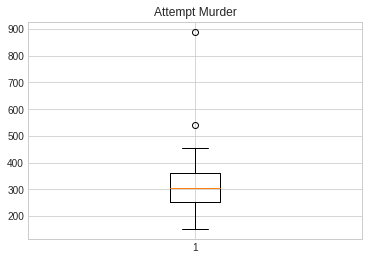

The following are the outliers in the boxplot:
    Gender  Year   x      y           label
5     Male  2010   3  540.0  Attempt Murder
24  Female  2013  56  890.0  Attempt Murder
Murder


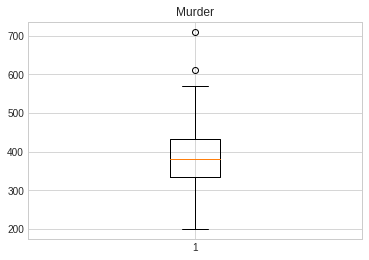

The following are the outliers in the boxplot:
    Gender  Year  x      y   label
686   Male  2020  3  610.0  Murder
741   Male  2017  4  710.0  Murder
Narcotics


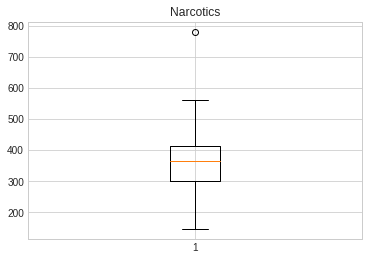

The following are the outliers in the boxplot:
     Gender  Year   x      y      label
1626   Male  2015  40  780.0  Narcotics
Other


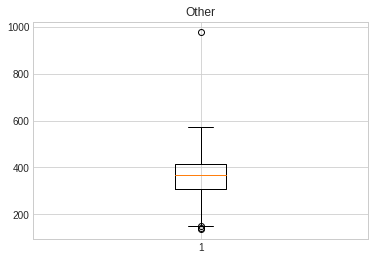

The following are the outliers in the boxplot:
      Gender  Year   x      y  label
1159    Male  2020   1  148.0  Other
1219  Female  2014   2  140.0  Other
1257  Female  2018   2  150.0  Other
1627  Female  2018  55  980.0  Other
1628  Female  2011  20  135.0  Other
Robbery


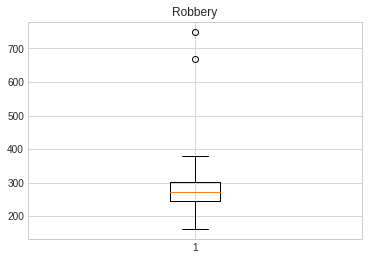

The following are the outliers in the boxplot:
     Gender  Year   x      y    label
1720   Male  2013   8  670.0  Robbery
1767   Male  2018  10  750.0  Robbery
Sexual Assault


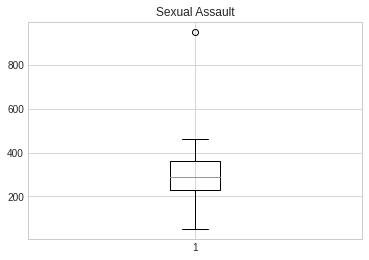

The following are the outliers in the boxplot:
     Gender  Year   x      y           label
269  Female  2016  14  950.0  Sexual Assault
Weapons


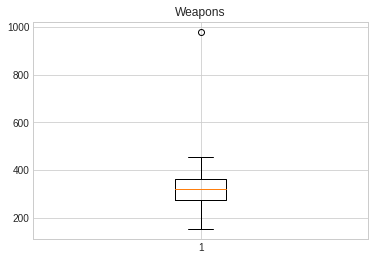

The following are the outliers in the boxplot:
    Gender  Year   x      y    label
462   Male  2014  30  980.0  Weapons
Total removed outliers by the end of this iteration:  14.0
To ensure there is no outliers another iteration is required
14.0
Attempt Murder


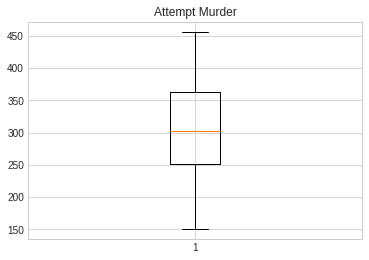

The following are the outliers in the boxplot:
Empty DataFrame
Columns: [Gender, Year, x, y, label]
Index: []
Murder


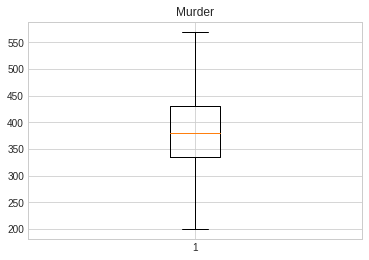

The following are the outliers in the boxplot:
Empty DataFrame
Columns: [Gender, Year, x, y, label]
Index: []
Narcotics


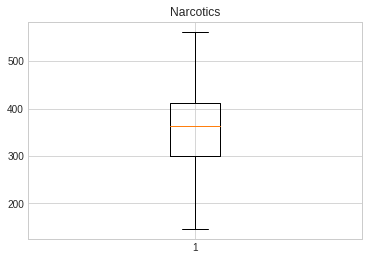

The following are the outliers in the boxplot:
Empty DataFrame
Columns: [Gender, Year, x, y, label]
Index: []
Other


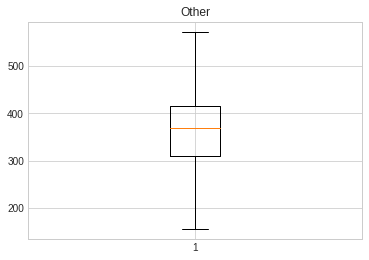

The following are the outliers in the boxplot:
Empty DataFrame
Columns: [Gender, Year, x, y, label]
Index: []
Robbery


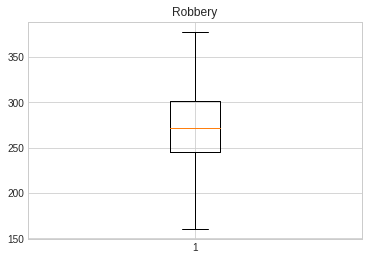

The following are the outliers in the boxplot:
Empty DataFrame
Columns: [Gender, Year, x, y, label]
Index: []
Sexual Assault


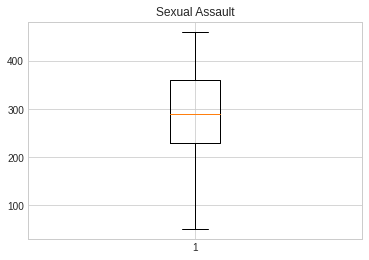

The following are the outliers in the boxplot:
Empty DataFrame
Columns: [Gender, Year, x, y, label]
Index: []
Weapons


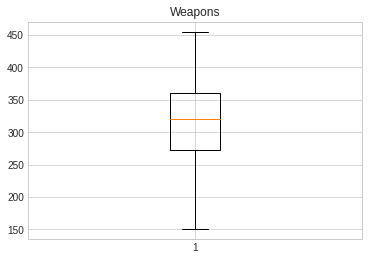

The following are the outliers in the boxplot:
Empty DataFrame
Columns: [Gender, Year, x, y, label]
Index: []
Total removed outliers by the end of this iteration:  0.0
There is not any outlier in the dataset


In [3]:
# to catch outliers in different charges
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

court_prep = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/court_prep_2.csv')
#court_prep = pd.read_csv('./court_prep_2.csv')
court_prep.head()

# remove duplicates
chargelist = court_prep['charge']
chargelist = list(dict.fromkeys(chargelist))
chargelist.sort()

print(chargelist)

df = pd.DataFrame(dict(x = court_prep['court_d'],
                       y = court_prep['prep_h'],
                       label = court_prep['charge'],
                       Gender = court_prep['Gender'],
                       Year = court_prep['Year']))


# -----------------------------------------------------------------------
# outliers in diff charges based on IQR rule
# -----------------------------------------------------------------------

#outliers_list = []
out_check = 1
while out_check != 0:
    print(out_check)
    out_check = 0
    for i in chargelist:
        print(i)
        df_plt = df[['Gender','Year','x','y','label']].loc[df.label == i]
        plt.boxplot(df_plt['y'])
        plt.title(i)
        plt.show()
        # finding the 1st quartile
        q1 = np.quantile(df_plt['y'], 0.25)

        # finding the 3rd quartile
        q3 = np.quantile(df_plt['y'], 0.75)
        med = np.median(df_plt['y'])

        # finding the iqr region
        iqr = q3-q1

        # finding upper and lower whiskers
        upper_bound = q3+(1.5*iqr)
        lower_bound = q1-(1.5*iqr)
        outliers = df_plt[(df_plt['y'] <= lower_bound) | (df_plt['y'] >= upper_bound)]
        out_check = out_check + outliers.size / 5 
        print('The following are the outliers in the boxplot:\n{}'.format(outliers))
        df.drop(df_plt[(df_plt['y'] <= lower_bound) | (df_plt['y'] >= upper_bound)].index, inplace = True)
    print("Total removed outliers by the end of this iteration: ", out_check)
    if out_check > 0:
        print("To ensure there is no outliers another iteration is required")
    else:
        print("There is not any outlier in the dataset")

df_cleaned = pd.DataFrame(dict(Gender = df['Gender'],
                               Year = df['Year'],
                               court_d = df['x'],
                               prep_h = df['y'],
                               charge = df['label']))

#prep_court_cleaned = df_cleaned
#df_cleaned.to_csv('prep_court_no_outlier.csv',index = False)



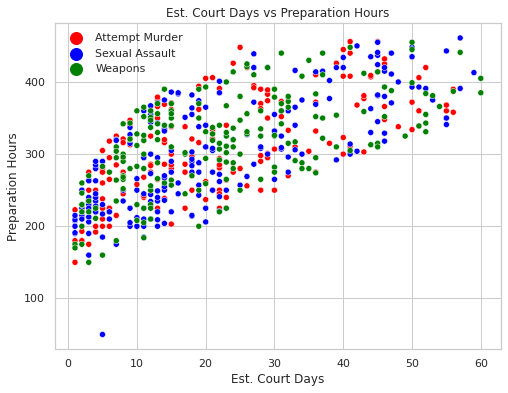

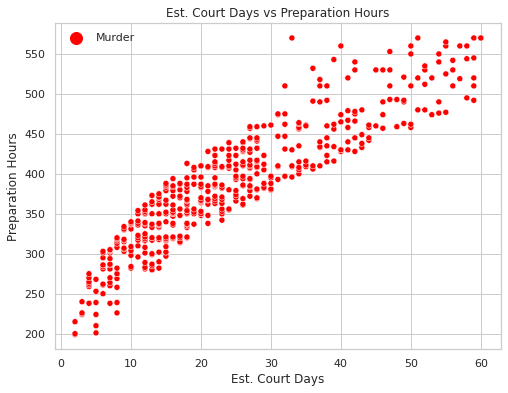

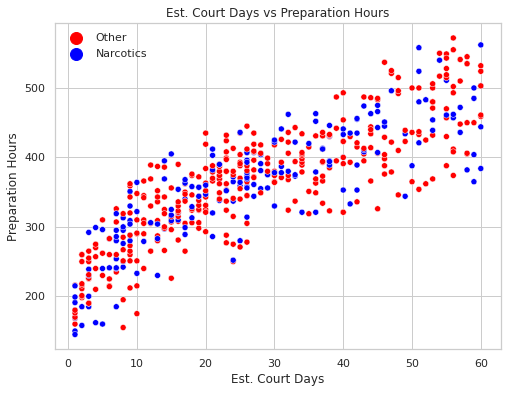

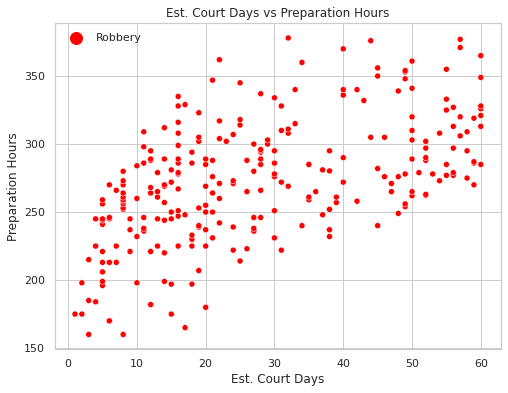

In [4]:
# plot all the charges in one scatter plot by seaborn
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np    
import seaborn as sns


court_prep = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/prep_court_no_outlier.csv')

sns.set(rc={'figure.figsize':(8,6)})

# plot Group 1:
df = pd.DataFrame(dict(x = court_prep['court_d'],
                       y = court_prep['prep_h'],
                       label = court_prep['charge']))
df1 = df[(df['label'] == 'Attempt Murder') | (df['label'] == 'Sexual Assault') | (df['label'] == 'Weapons')]
sns.set_style("whitegrid")
sns.scatterplot(data=df1, x="x", y="y", hue="label", palette=['red','blue','green'])
plt.legend(markerscale=2)
#sns.scatterplot.title('Est Court Days vs Preparation Hours')
plt.title('Est. Court Days vs Preparation Hours') #title
plt.xlabel('Est. Court Days') #x label
plt.ylabel('Preparation Hours') #y label
plt.show()


# plot Group 2:
df2 = df[(df['label'] == 'Murder')]
sns.set_style("whitegrid")
sns.scatterplot(data=df2, x="x", y="y", hue="label", palette=['red'])
plt.legend(markerscale=2)
#sns.scatterplot.title('Est Court Days vs Preparation Hours')
plt.title('Est. Court Days vs Preparation Hours') #title
plt.xlabel('Est. Court Days') #x label
plt.ylabel('Preparation Hours') #y label
plt.show()


# plot Group 3:
df3 = df[(df['label'] == 'Narcotics') | (df['label'] == 'Other')]
sns.set_style("whitegrid")
sns.scatterplot(data=df3, x="x", y="y", hue="label", palette=['red','blue'])
plt.legend(markerscale=2)
#sns.scatterplot.title('Est Court Days vs Preparation Hours')
plt.title('Est. Court Days vs Preparation Hours') #title
plt.xlabel('Est. Court Days') #x label
plt.ylabel('Preparation Hours') #y label
plt.show()

# plot Group 4:
df2 = df[(df['label'] == 'Robbery')]
sns.set_style("whitegrid")
sns.scatterplot(data=df2, x="x", y="y", hue="label", palette=['red'])
plt.legend(markerscale=2)
#sns.scatterplot.title('Est Court Days vs Preparation Hours')
plt.title('Est. Court Days vs Preparation Hours') #title
plt.xlabel('Est. Court Days') #x label
plt.ylabel('Preparation Hours') #y label
plt.show()




In [5]:
# T-Test and leneve test for mu and sigma of various charges

import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from scipy.stats import levene
from scipy.stats import ttest_ind
import scipy.stats



court_prep = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/prep_court_no_outlier.csv')
#court_prep = pd.read_csv('./court_prep_2.csv')
#court_prep= pd.read_csv('./prep_court_no_outlier.csv')



# remove duplicates
chargelist = court_prep['charge']
chargelist = list(dict.fromkeys(chargelist))
chargelist.sort()
#print(chargelist)

f_tests = {'charge':['Attempt Murder', 'Murder', 'Narcotics', 'Other', 'Robbery', 'Sexual Assault', 'Weapons'],
    'Attempt Murder':[1,2,3,4,5,6,7],
           'Murder':[1,2,3,4,5,6,7],
           'Narcotics':[1,2,3,4,5,6,7],
           'Other':[1,2,3,4,5,6,7],
           'Robbery':[1,2,3,4,5,6,7],
           'Sexual Assault':[1,2,3,4,5,6,7],
           'Weapons':[1,2,3,4,5,6,7]
          }

for charge_1,i in zip(chargelist, range(len(chargelist))):
    for charge_2,j in zip(chargelist, range(len(chargelist))):
#        print(i,j)
#        print(charge_1,charge_2)
#        print(pd.DataFrame(t_tests).iloc[i][j])
        stat, p_value = levene(court_prep['prep_h'].loc[court_prep.charge == charge_1],
                                  court_prep['prep_h'].loc[court_prep.charge == charge_2]
                                 )
        f_tests[charge_1][j] = round(p_value,3)

f_tests = pd.DataFrame(f_tests)
print("P_value matrix for Fisher tests:\n H_0: Sigma_a = Sigma_b H_1: rejects H_0")
print(f_tests)

#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------
# two-sample T-Test
#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------



t_tests = {'charge':['Attempt Murder', 'Murder', 'Narcotics', 'Other', 'Robbery', 'Sexual Assault', 'Weapons'],
    'Attempt Murder':[1,2,3,4,5,6,7],
           'Murder':[1,2,3,4,5,6,7],
           'Narcotics':[1,2,3,4,5,6,7],
           'Other':[1,2,3,4,5,6,7],
           'Robbery':[1,2,3,4,5,6,7],
           'Sexual Assault':[1,2,3,4,5,6,7],
           'Weapons':[1,2,3,4,5,6,7]
          }

for charge_1,i in zip(chargelist, range(len(chargelist))):
    for charge_2,j in zip(chargelist, range(len(chargelist))):
#        print(i,j)
#        print(charge_1,charge_2)
#        print(pd.DataFrame(t_tests).iloc[i][j])
        stat, p_value = ttest_ind(court_prep['prep_h'].loc[court_prep.charge == charge_1],
                                  court_prep['prep_h'].loc[court_prep.charge == charge_2]
                                 )
        t_tests[charge_1][j] = round(p_value,3)

t_tests = pd.DataFrame(t_tests)

print("P_value matrix for T-Student (two independent samples) tests:\n H_0: Mu_a = Mu_b H_1: rejects H_0")
print(t_tests)


print("\n\nObservation:\n based on the t_tests' and levene' p_values (two-tailed tests) if we assume alpha = 0.01 we can conclude: \n Charges are coming from four different populations:\n 1 - Murder,\n 2 - Robbery,\n 3 - Narcatics, Other, \n 4 - Attempt Murder, Sexual Assault, Weapons")
print("It means that we can group the charges in 4 category and continue the modeling process for each one of these four groups")
print("Note. Please note that this is the preliminary finding and further scrutiny is required to ensure the findings are accurate and reliable")
#f_tests.head(7)
t_tests.head(7)

P_value matrix for Fisher tests:
 H_0: Sigma_a = Sigma_b H_1: rejects H_0
           charge  Attempt Murder  Murder  Narcotics  Other  Robbery  \
0  Attempt Murder           1.000   0.309      0.018  0.029      0.0   
1          Murder           0.309   1.000      0.064  0.096      0.0   
2       Narcotics           0.018   0.064      1.000  0.674      0.0   
3           Other           0.029   0.096      0.674  1.000      0.0   
4         Robbery           0.000   0.000      0.000  0.000      1.0   
5  Sexual Assault           0.033   0.204      0.517  0.801      0.0   
6         Weapons           0.177   0.015      0.001  0.001      0.0   

   Sexual Assault  Weapons  
0           0.033    0.177  
1           0.204    0.015  
2           0.517    0.001  
3           0.801    0.001  
4           0.000    0.000  
5           1.000    0.001  
6           0.001    1.000  
P_value matrix for T-Student (two independent samples) tests:
 H_0: Mu_a = Mu_b H_1: rejects H_0
           charge  A

,charge,Attempt Murder,Murder,Narcotics,Other,Robbery,Sexual Assault,Weapons
0,Attempt Murder,1.000,0.0,0.000,0.000,0.0,0.169,0.220
1,Murder,0.000,1.0,0.000,0.000,0.0,0.000,0.000
2,Narcotics,0.000,0.0,1.000,0.264,0.0,0.000,0.000
3,Other,0.000,0.0,0.264,1.000,0.0,0.000,0.000
4,Robbery,0.000,0.0,0.000,0.000,1.0,0.000,0.000
5,Sexual Assault,0.169,0.0,0.000,0.000,0.0,1.000,0.009
6,Weapons,0.220,0.0,0.000,0.000,0.0,0.009,1.000


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of all charges next together')

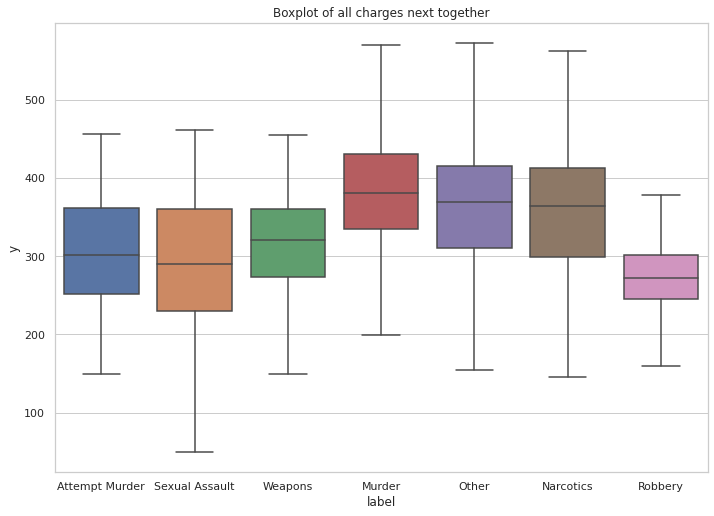

In [8]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/prep_court_no_outlier.csv')



df = pd.DataFrame(dict(x = df['court_d'],
                       y = df['prep_h'],
                       label = df['charge']))

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.boxplot('label','y', data = df)
plt.title("Boxplot of all charges next together")




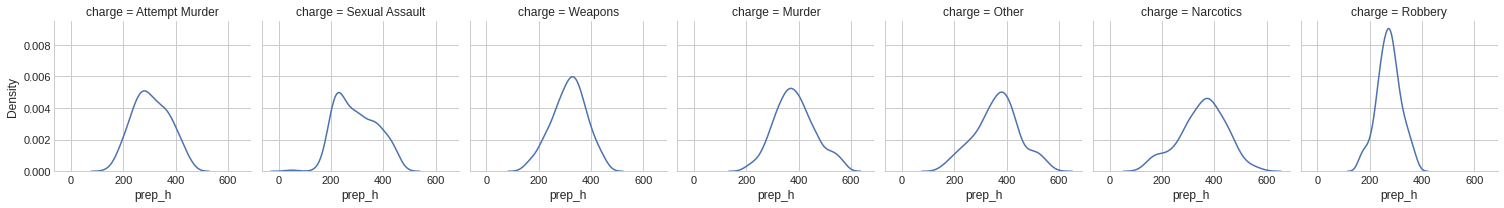

In [9]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import seaborn as sns


df = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/prep_court_no_outlier.csv')
#df = pd.read_csv('./court_prep_2.csv')
#df = pd.read_csv('./prep_court_no_outlier.csv')


g = sns.FacetGrid(df,col='charge')
g = g.map(sns.kdeplot, 'prep_h')

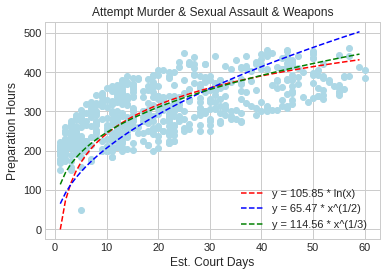

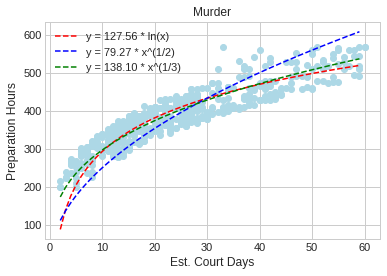

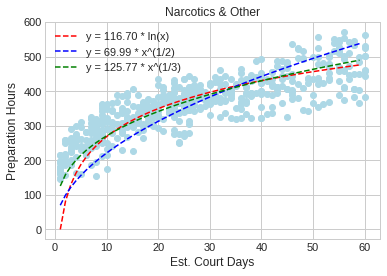

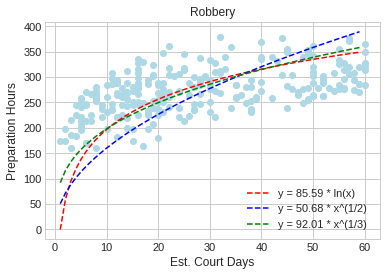

In [10]:
# fit a straight line to the economic data

from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

#--------------------------------------------------------------------------
#--------------------------------------------------------------------------
#================ the basis function ==================

def model1(x, a):
    return a * np.log(x)


def model2(x, b):
    return b * x**(1/2)

def model3(x, c):
    return c * x**(1/3)


#--------------------------------------------------------------------------
#--------------------------------------------------------------------------
#fit curve

df = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/prep_court_no_outlier.csv')

#df = pd.read_csv('./court_prep_2.csv')
#df = pd.read_csv('./prep_court_no_outlier.csv')

df = pd.DataFrame(dict(x = df['court_d'],
                       y = df['prep_h'],
                       label = df['charge']))

df.loc[ df.label == 'Murder','label2'] = 'Murder'
df.loc[ df.label == 'Robbery','label2'] = 'Robbery'
df.loc[(df.label == 'Attempt Murder') | 
       (df.label == 'Sexual Assault') | 
       (df.label == 'Weapons'),'label2'] = 'Attempt Murder & Sexual Assault & Weapons'
df.loc[(df.label == 'Narcotics') | 
       (df.label == 'Other'),'label2'] = 'Narcotics & Other'




# remove duplicates
chargelist = df['label2']
chargelist = list(dict.fromkeys(chargelist))
chargelist.sort()

for label2 in chargelist:
    df1 = df[(df['label2']== label2 )] 
    
    x = df1['x']
    y = df1['y']
    popt, cov =curve_fit(model1, x, y)
    a = popt
    cov_1 = cov
#    print('y = %.2f * ln(x) ' % (a))
#    print(cov_1)
    popt2, cov =curve_fit(model2, x, y)
    b = popt2
    cov_2 = cov
#    print('y = %.2f * x^(1/2) ' % (b))
#    print(cov_2)
    popt3, cov =curve_fit(model3, x, y)
    c = popt3
    cov_3 = cov
#    print('y = %.2f * x^(1/3) ' % (c))
#    print(cov_3)

    
        # plot input vs output
    pyplot.scatter(x, y, color = 'lightblue')
    #sns.scatterplot(data=df, x='x', y='y')
    # define a sequence of inputs between the smallest and largest known inputs
    x_line = arange(min(x), max(x), 1)
    # calculate the output for the range
    y_line = model1(x_line, a)
    y_line2 = model2(x_line, b)
    y_line3 = model3(x_line, c)

    # create a line plot for the mapping function
    pyplot.plot(x_line, y_line, '--', color='red',label = 'y = %.2f * ln(x) ' % (a))
    pyplot.plot(x_line, y_line2, '--', color='blue',label = 'y = %.2f * x^(1/2) ' % (b))
    pyplot.plot(x_line, y_line3, '--', color='green',label = 'y = %.2f * x^(1/3) ' % (c))
    
    pyplot.title(label2)
    pyplot.xlabel('Est. Court Days')
    pyplot.ylabel('Preparation Hours')
    pyplot.legend(loc="best")
    pyplot.show()
    
    
    

In [11]:
import pandas as pd
import numpy as np
import scipy.stats
import scipy.optimize
import matplotlib.pyplot as plt
import statsmodels.api as sm

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

df = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/prep_court_no_outlier.csv')




df = pd.DataFrame(dict(x = df['court_d'],
                       y = df['prep_h'],
                       charge = df['charge']))



df.loc[ df.charge == 'Murder','group'] = 'Murder'
df.loc[ df.charge == 'Robbery','group'] = 'Robbery'
df.loc[(df.charge == 'Attempt Murder') | 
       (df.charge == 'Sexual Assault') | 
       (df.charge == 'Weapons'),'group'] = 'Attempt Murder & Sexual Assault & Weapons'
df.loc[(df.charge == 'Narcotics') | 
       (df.charge == 'Other'),'group'] = 'Narcotics & Other'

# remove duplicates
chargelist = df['group']
chargelist = list(dict.fromkeys(chargelist))
chargelist.sort()

print("\n================================================================================================") 
print("----------------------------------- Model-1: y = a * ln(x) ---------------------------------------")
print("================================================================================================\n") 

for item in chargelist:
    print("-------------------",item,"------------------------------")
    x = np.array(df.x[(df['group']== item)])
    y = np.array(df.y[(df['group']== item)])
    sqrt_3 = np.log(x)
    model = sm.OLS(y, sqrt_3)
    results = model.fit()
    print(results.summary())
    print("Parameters: ", results.params)
    print("R2: ", results.rsquared)


print("\n================================================================================================") 
print("----------------------------------- Model-2: y = a * x ^ (1/2)  ----------------------------------")
print("================================================================================================\n") 

for item in chargelist:
    print("-------------------",item,"------------------------------")
    x = np.array(df.x[(df['group']== item)])
    y = np.array(df.y[(df['group']== item)])
    sqrt_3 = x ** (1/2)
    model = sm.OLS(y, sqrt_3)
    results = model.fit()
    print(results.summary())
    print("Parameters: ", results.params)
    print("R2: ", results.rsquared)


    
print("\n================================================================================================") 
print("----------------------------------- Model-3: y = a * x ^ (1/3)  ----------------------------------")
print("================================================================================================\n") 

for item in chargelist:
    print("-------------------",item,"------------------------------")
    x = np.array(df.x[(df['group']== item)])
    y = np.array(df.y[(df['group']== item)])
    sqrt_3 = x ** (1/3)
    model = sm.OLS(y, sqrt_3)
    results = model.fit()
    print(results.summary())
    print("Parameters: ", results.params)
    print("R2: ", results.rsquared)
    
    



----------------------------------- Model-1: y = a * ln(x) ---------------------------------------

------------------- Attempt Murder & Sexual Assault & Weapons ------------------------------
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              9622.
Date:                Tue, 07 Dec 2021   Prob (F-statistic):                        0.00
Time:                        21:33:58   Log-Likelihood:                         -3351.4
No. Observations:                 584   AIC:                                      6705.
Df Residuals:                     583   BIC:                                      6709.
Df Model:                           1                                                  
Covariance Typ

In [12]:
# K-S test for each group
import pandas as pd
from numpy import arange
from scipy.optimize import curve_fit
from matplotlib import pyplot
# K S test for normal distribution
from scipy.stats import kstest


df = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/prep_court_no_outlier.csv')
#df.info()

#df = pd.read_csv('./court_prep_2.csv')
#df = pd.read_csv('./prep_court_no_outlier.csv')

df = pd.DataFrame(dict(x = df['court_d'],
                       y = df['prep_h'],
                       label = df['charge']))

df.loc[ df.label == 'Murder','label2'] = 'Murder'
df.loc[ df.label == 'Robbery','label2'] = 'Robbery'
df.loc[(df.label == 'Attempt Murder') | 
       (df.label == 'Sexual Assault') | 
       (df.label == 'Weapons'),'label2'] = 'Attempt Murder & Sexual Assault & Weapons'
df.loc[(df.label == 'Narcotics') | 
       (df.label == 'Other'),'label2'] = 'Narcotics & Other'



# remove duplicates
chargelist = df['label']
chargelist = list(dict.fromkeys(chargelist))
chargelist.sort()


p_value_res = []

for label in chargelist:
    df1 = df[(df['label']== label )] 
    df_norm_test = (df1['y'] - df1['y'].mean()) / df1['y'].std()
    df_norm_test.head(50)
    stat, p_value = kstest(df_norm_test, 'norm')
    p_value_res.append(round(p_value,3))
    print(label)
    print(round(p_value,2))
    
print(p_value_res)    

    

Attempt Murder
0.48
Murder
0.16
Narcotics
0.33
Other
0.31
Robbery
0.75
Sexual Assault
0.02
Weapons
0.75
[0.482, 0.158, 0.326, 0.31, 0.749, 0.018, 0.749]


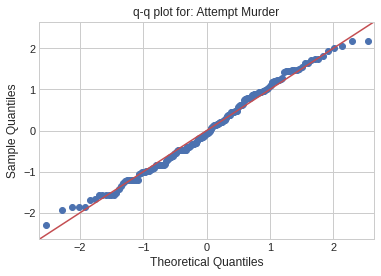

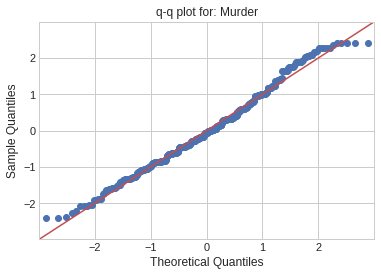

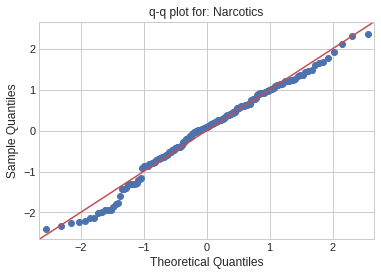

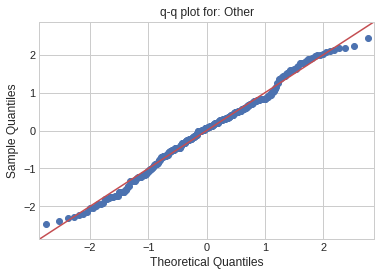

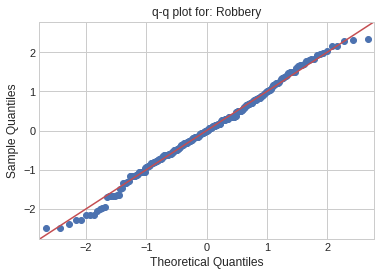

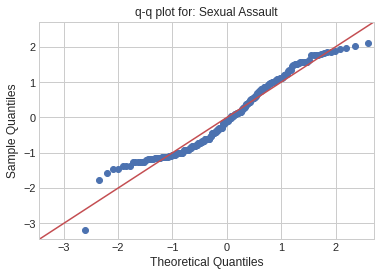

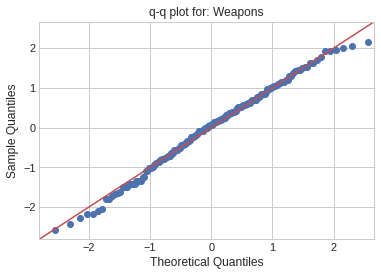

In [13]:
# qq plots
import numpy as np
import statsmodels.api as sm
import pylab as py
import pandas as pd
from numpy import arange
from scipy.optimize import curve_fit
from matplotlib import pyplot
# K S test for normal distribution
from scipy.stats import kstest


df = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/prep_court_no_outlier.csv')

df = pd.DataFrame(dict(x = df['court_d'],
                       y = df['prep_h'],
                       label = df['charge']))

df.loc[ df.label == 'Murder','label2'] = 'Murder'
df.loc[ df.label == 'Robbery','label2'] = 'Robbery'
df.loc[(df.label == 'Attempt Murder') | 
       (df.label == 'Sexual Assault') | 
       (df.label == 'Weapons'),'label2'] = 'Attempt Murder & Sexual Assault & Weapons'
df.loc[(df.label == 'Narcotics') | 
       (df.label == 'Other'),'label2'] = 'Narcotics & Other'



# remove duplicates
chargelist = df['label']
chargelist = list(dict.fromkeys(chargelist))
chargelist.sort()


# np.random generates different random numbers
# whenever the code is executed
# Note: When you execute the same code 
# the graph look different than shown below.
  
# Random data points generated

for label in chargelist:
    df1 = df[(df['label']== label )] 
    df_norm_test = (df1['y'] - df1['y'].mean()) / df1['y'].std()
    sm.qqplot(df_norm_test, line ='45')
    py.title('q-q plot for: '+label)
    py.show()

In [18]:
# key assumptions tests for Model - 3
import numpy as np
import scipy.stats as st

import pandas as pd
import numpy as np
import scipy.stats
import scipy.optimize
import matplotlib.pyplot as plt
from scipy.stats import kstest
from scipy.stats import norm
import statsmodels.api as sm



df = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/prep_court_no_outlier.csv')





df = pd.DataFrame(dict(x = df['court_d'],
                       y = df['prep_h'],
                       charge = df['charge']))



df.loc[ df.charge == 'Murder','group'] = 'Murder'
df.loc[ df.charge == 'Robbery','group'] = 'Robbery'
df.loc[(df.charge == 'Attempt Murder') | 
       (df.charge == 'Sexual Assault') | 
       (df.charge == 'Weapons'),'group'] = 'Attempt Murder & Sexual Assault & Weapons'
df.loc[(df.charge == 'Narcotics') | 
       (df.charge == 'Other'),'group'] = 'Narcotics & Other'

# remove duplicates
chargelist = df['group']
chargelist = list(dict.fromkeys(chargelist))
chargelist.sort()




    
print("\n================================================================================================") 
print("----------------------------------- Model-3: y = a * x ^ (1/3)  ----------------------------------")
print("================================================================================================\n") 

for item in chargelist:
    print("-------------------",item,"------------------------------")
    x = np.array(df.x[(df['group']== item)])
    y = np.array(df.y[(df['group']== item)])
    df2 = df[(df['group']== item)]
    sqrt_3 = x ** (1/3)
    model = sm.OLS(y, sqrt_3)
    results = model.fit()
#    print(results.summary())
    pred_ols = results.predict()
    residuals = y - pred_ols
    
    df_norm_test = (residuals - residuals.mean()) / residuals.std()
    stat, p_value = kstest(df_norm_test, 'norm')

    print("p_value:", round(p_value,2))
    


    



----------------------------------- Model-3: y = a * x ^ (1/3)  ----------------------------------

------------------- Attempt Murder & Sexual Assault & Weapons ------------------------------
p_value: 0.01
------------------- Murder ------------------------------
p_value: 0.02
------------------- Narcotics & Other ------------------------------
p_value: 0.24
------------------- Robbery ------------------------------
p_value: 0.21
